<a href="https://colab.research.google.com/github/inigmat/exupery/blob/main/SandDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Simple transportation problem (distributing materials across the sites)**

Five construction sites utilize sand extracted from three soil stockpiles. The daily productivity of each quarry (column 'Stock pile'), the sand requirement for each site, and the distances from quarries to consumers are presented in the table.

***Distances from the stockpiles to the sites and requested quantity of sand***

| Stock pile | Site 1 | Site 2 | Site 3 | Site 4 | Site 5 |
| --- | --- | --- | --- | --- | --- |
| 1000 | 6 | 7 | 5 | 9 | 4 |
| 800 | 4 | 5 | 3 | 7 | 2 |
| 1800 | 2 | 3 | 4 | 5 | 6 |
| Requested Qty, tonnes | 600 | 400 | 800 | 1200 | 600 |

Solve the problem of a optimal sand transportation plan that minimizes the total transportation in ton-kilometers.

## **Installing CPLEX and docplex if they are not installed and reloading runtime**


In [1]:
import sys

try:
    import docplex.mp
except:
    if hasattr(sys, 'real_prefix'):
        !pip install docplex
    else:
        !pip install --user docplex

try:
    import cplex
except:
    if hasattr(sys, 'real_prefix'):
        !pip install cplex
    else:
        !pip install --user cplex
        exit()

## **Solve the problem**

In [2]:
from docplex.mp.model import Model

# Data from the table
stock_piles = [1000, 800, 1800]
sites = [1, 2, 3, 4, 5]
requested_qty = [600, 400, 800, 1200, 600]
distances = [
    [6, 7, 5, 9, 4],
    [4, 5, 3, 7, 2],
    [2, 3, 4, 5, 6]
]

# Enumerate the data for using it in code
stock_piles_nums = range(len(stock_piles))
sites_nums = range(len(sites))

# Create a model
model = Model(name='sand_transportation')

# Decision variables - amount of sand transported from each stockpile to each site
x = {(i, j): model.continuous_var(name='x_{0}_{1}'.format(i, j)) for i in stock_piles_nums for j in sites_nums}

# Constraints on the productivity of stockpiles
for i in stock_piles_nums:
    model.add_constraint(model.sum(x[i, j] for j in sites_nums) <= stock_piles[i])

# Constraints on the sand consumption at sites
for j in sites_nums:
    model.add_constraint(model.sum(x[i, j] for i in stock_piles_nums) == requested_qty[j])

# Minimize the total transportation distance
model.minimize(model.sum(distances[i][j] * x[i, j] for i in stock_piles_nums for j in sites_nums))

# Solve the problem
solution = model.solve()

# Output the results
print(solution)

solution for: sand_transportation
objective: 14800
status: OPTIMAL_SOLUTION(2)
x_0_0=400.000
x_0_2=600.000
x_1_2=200.000
x_1_4=600.000
x_2_0=200.000
x_2_1=400.000
x_2_3=1200.000



## **Get the results in table**

In [3]:
import pandas as pd

# Create a Dataframe for the results
distribution_df = pd.DataFrame(columns=[f'Site {j+1}' for j in sites_nums],
                         index=[f'Stockpile {i+1}' for i in stock_piles_nums])

# Fill the DataFrame with values from the solution
for i in stock_piles_nums:
    for j in sites_nums:
        distribution_df.at[f'Stockpile {i+1}', f'Site {j+1}'] = x[i, j].solution_value

# Display the DataFrame
distribution_df

,Site 1,Site 2,Site 3,Site 4,Site 5
Stockpile 1,400.0,0,600.0,0,0
Stockpile 2,0,0,200.0,0,600.0
Stockpile 3,200.0,400.0,0,1200.0,0


## **The results can be presented in a diagram**

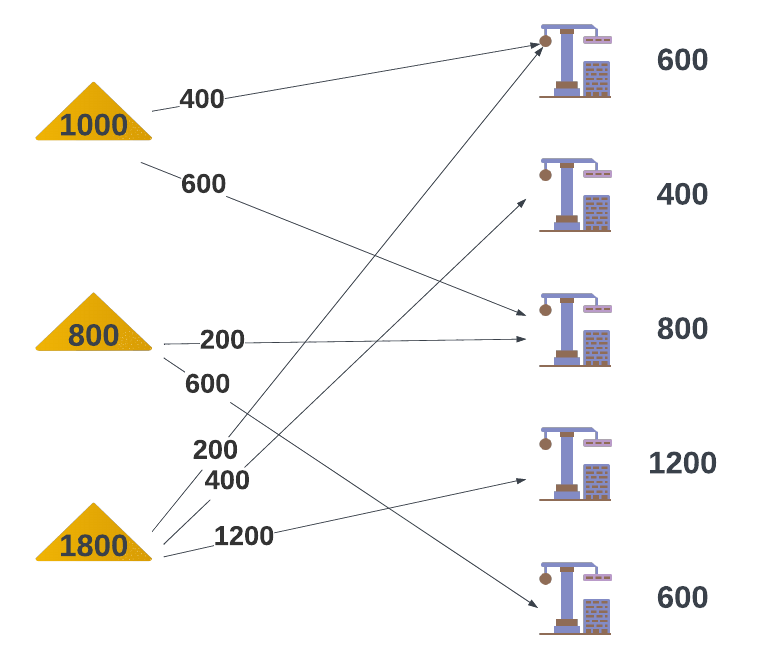

## **Links**

*   [Tutorial: Beyond Linear Programming, (CPLEX Part2)](https://ibmdecisionoptimization.github.io/tutorials/html/Beyond_Linear_Programming.html#Network-models)


